# AirBnB data cleaning

## Notebook set-up

Assume we are preparing this data for a linear regression model.

In [1]:
# PyPI imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression

import gperdrizet_functions as funcs

## 1. Data loading

In [2]:
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data_df.head().transpose()

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


## 2. Feature selection

In [3]:
numerical_features=[
    'price',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

categorical_features=['neighbourhood_group','room_type']

data_df=data_df[numerical_features + categorical_features].copy()

## 3. Feature encoding

### 3.1. Label encoding

In [4]:
label_encoders={}
label_encoded_data_df=data_df.copy()

for feature in categorical_features:
    label_encoder=LabelEncoder()
    label_encoded_data_df[feature]=label_encoder.fit_transform(label_encoded_data_df[feature])
    label_encoders[feature]=label_encoder

label_encoded_data_df.head().transpose()

,0,1,2,3,4
price,149.00000,225.00000,150.00000,89.00000,80.00000
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.94190,-73.95976,-73.94399
minimum_nights,1.00000,1.00000,3.00000,1.00000,10.00000
number_of_reviews,9.00000,45.00000,0.00000,270.00000,9.00000
reviews_per_month,0.21000,0.38000,NaN,4.64000,0.10000
calculated_host_listings_count,6.00000,2.00000,1.00000,1.00000,1.00000
availability_365,365.00000,355.00000,365.00000,194.00000,0.00000
neighbourhood_group,1.00000,2.00000,2.00000,1.00000,2.00000
room_type,1.00000,0.00000,1.00000,0.00000,0.00000


### 3.2. One-hot encoding

In [5]:
one_hot_encoded_data_df=data_df.copy()

one_hot_encoder=OneHotEncoder(drop='first',sparse_output=False)
one_hot_encoded_data=one_hot_encoder.fit_transform(one_hot_encoded_data_df[categorical_features])
one_hot_encoded_data_df=pd.DataFrame(one_hot_encoded_data, columns=one_hot_encoder.get_feature_names_out())
one_hot_encoded_data_df=pd.concat([one_hot_encoded_data_df, data_df[numerical_features]], axis=1)
one_hot_encoded_data_df.head().transpose()

,0,1,2,3,4
neighbourhood_group_Brooklyn,1.00000,0.00000,0.00000,1.00000,0.00000
neighbourhood_group_Manhattan,0.00000,1.00000,1.00000,0.00000,1.00000
neighbourhood_group_Queens,0.00000,0.00000,0.00000,0.00000,0.00000
neighbourhood_group_Staten Island,0.00000,0.00000,0.00000,0.00000,0.00000
room_type_Private room,1.00000,0.00000,1.00000,0.00000,0.00000
room_type_Shared room,0.00000,0.00000,0.00000,0.00000,0.00000
price,149.00000,225.00000,150.00000,89.00000,80.00000
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.94190,-73.95976,-73.94399
minimum_nights,1.00000,1.00000,3.00000,1.00000,10.00000


## 4. Missing data

In [6]:
datasets={}

### 4.1. Drop

In [7]:
dropped_label_encoded_df=label_encoded_data_df.copy()
dropped_label_encoded_df.dropna(inplace=True)
datasets['Dropped, label encoded']=dropped_label_encoded_df

dropped_one_hot_encoded_df=one_hot_encoded_data_df.copy()
dropped_label_encoded_df.dropna(inplace=True)
datasets['Dropped, one-hot encoded']=dropped_one_hot_encoded_df

### 4.2. Fill with median

In [8]:
median_imputed_label_encoded_df=label_encoded_data_df.copy()
median_imputer=SimpleImputer(strategy='median')
median_imputed_label_encoded_df[numerical_features]=median_imputer.fit_transform(data_df[numerical_features])
datasets['Median imputed, label encoded']=median_imputed_label_encoded_df

median_imputed_one_hot_encoded_df=one_hot_encoded_data_df.copy()
median_imputer=SimpleImputer(strategy='median')
median_imputed_one_hot_encoded_df[numerical_features]=median_imputer.fit_transform(data_df[numerical_features])
datasets['Median imputed, one-hot encoded']=median_imputed_one_hot_encoded_df

### 4.3. KNN imputation

In [9]:
knn_imputed_label_encoded_df=label_encoded_data_df.copy()
knn_imputer=KNNImputer()
knn_imputed_label_encoded_df[numerical_features]=knn_imputer.fit_transform(data_df[numerical_features])
datasets['KNN imputed, label encoded']=median_imputed_label_encoded_df

knn_imputed_one_hot_encoded_df=one_hot_encoded_data_df.copy()
knn_imputer=KNNImputer()
knn_imputed_one_hot_encoded_df[numerical_features]=knn_imputer.fit_transform(data_df[numerical_features])
datasets['KNN imputed, one-hot encoded']=knn_imputed_one_hot_encoded_df

### 4.3. Results

In [10]:
features=[
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'neighbourhood_group',
    'room_type'
]

label='price'

linear_results_df=funcs.test_features(LinearRegression(), datasets, label)

data=[list(x) for _, x in linear_results_df.groupby('Feature set')['Explained variance']]
labels=[[x]*len(y) for x, y in linear_results_df.groupby('Feature set')['Explained variance']]
results=kruskal(*data)
print(f'Kruskal-Wallis p-value: {results.pvalue:.3f}\n')

result=pairwise_tukeyhsd(np.concatenate(data), np.concatenate(labels), alpha=0.05)
print(result)

Kruskal-Wallis p-value: 0.028

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                         group2             meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------
       Dropped, label encoded        Dropped, one-hot encoded   0.0177  0.936 -0.0367  0.0721  False
       Dropped, label encoded      KNN imputed, label encoded  -0.0455 0.1577    -0.1  0.0089  False
       Dropped, label encoded    KNN imputed, one-hot encoded  -0.0338 0.4747 -0.0882  0.0206  False
       Dropped, label encoded   Median imputed, label encoded  -0.0455 0.1577    -0.1  0.0089  False
       Dropped, label encoded Median imputed, one-hot encoded  -0.0337  0.477 -0.0881  0.0207  False
     Dropped, one-hot encoded      KNN imputed, label encoded  -0.0633 0.0125 -0.1177 -0.0089   True
     Dropped, one-hot encoded    KNN imputed, one-hot encode

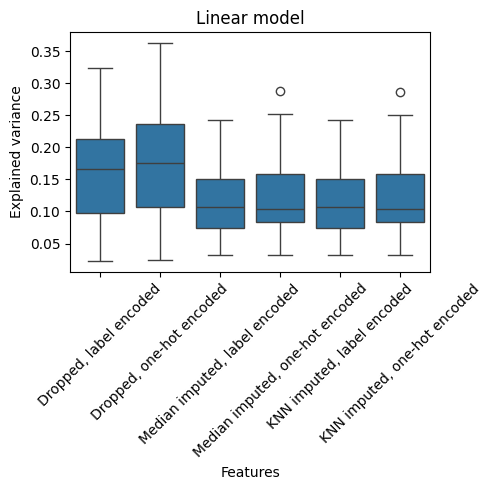

In [11]:
fig, axs=plt.subplots(1,1, figsize=(5,5), sharey=True)
#axs=axs.flatten()

sns.boxplot(linear_results_df, x='Feature set', y='Explained variance', ax=axs)
axs.set_title('Linear model')
axs.set_xlabel('Features')
axs.tick_params(axis='x', labelrotation=45)

# sns.boxplot(tree_results_df, x='Feature set', y='Explained variance', ax=axs[1])
# axs[1].set_title('Tree model')
# axs[1].set_xlabel('Features')
# axs[1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

## 5. Extreem values

### 5.1. Institutional hosts

In [12]:
datasets={}

In [13]:
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
hosts_cleaned_df=data_df.copy()
institutional_hosts=['Blueground','Sonder (NYC)','Row NYC']
hosts_cleaned_df=data_df[~data_df['host_name'].isin(institutional_hosts)]
datasets['Hosts cleaned']=hosts_cleaned_df[numerical_features + categorical_features]
hosts_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48327 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48327 non-null  int64  
 1   name                            48311 non-null  object 
 2   host_id                         48327 non-null  int64  
 3   host_name                       48306 non-null  object 
 4   neighbourhood_group             48327 non-null  object 
 5   neighbourhood                   48327 non-null  object 
 6   latitude                        48327 non-null  float64
 7   longitude                       48327 non-null  float64
 8   room_type                       48327 non-null  object 
 9   price                           48327 non-null  int64  
 10  minimum_nights                  48327 non-null  int64  
 11  number_of_reviews               48327 non-null  int64  
 12  last_review                     38602

### 5.2. Clip price

In [14]:
price_clipped_df=data_df.copy()
price_clipped_df['price']=price_clipped_df['price'].clip(upper=5000)
datasets['Price clipped']=price_clipped_df[numerical_features + categorical_features]
price_clipped_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,151.610778,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,206.682511,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,5000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 5.3. Clip price and clean hosts

In [15]:
price_clipped_host_cleaned_df=data_df.copy()
price_clipped_host_cleaned_df['price']=price_clipped_host_cleaned_df['price'].clip(upper=5000)
price_clipped_host_cleaned_df=price_clipped_host_cleaned_df[~price_clipped_host_cleaned_df['host_name'].isin(institutional_hosts)]
datasets['Hosts cleaned, price clipped']=price_clipped_host_cleaned_df[numerical_features + categorical_features]
price_clipped_host_cleaned_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.832700e+04,4.832700e+04,48327.000000,48327.000000,48327.000000,48327.000000,48327.000000,38602.000000,48327.000000,48327.000000
mean,1.886013e+07,6.636816e+07,40.728936,-73.951644,150.185983,6.867755,23.514598,1.368445,3.899911,110.793925
std,1.094873e+07,7.798204e+07,0.054788,0.046143,207.180028,20.503222,44.747087,1.650980,12.373753,130.801058
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.392524e+06,7.652584e+06,40.689780,-73.982490,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.946628e+07,3.028359e+07,40.723080,-73.955290,105.000000,2.000000,5.000000,0.710000,1.000000,42.000000
75%,2.884009e+07,1.048136e+08,40.763355,-73.935770,175.000000,5.000000,24.000000,2.010000,2.000000,220.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,5000.000000,1250.000000,629.000000,20.940000,121.000000,365.000000


### 5.4. Encode and impute

In [16]:
for dataset, data_df in datasets.items():
    print(dataset)
    one_hot_encoder=OneHotEncoder(drop='first',sparse_output=False)
    data=one_hot_encoder.fit_transform(data_df[categorical_features])
    encoded_data_df=pd.DataFrame(data, columns=one_hot_encoder.get_feature_names_out())
    data_df=pd.concat([encoded_data_df, data_df[numerical_features]], axis=1)

    knn_imputer=KNNImputer()
    data_df[numerical_features]=knn_imputer.fit_transform(data_df[numerical_features])
    datasets[dataset]=data_df

datasets['Raw']=knn_imputed_one_hot_encoded_df

Hosts cleaned
Price clipped
Hosts cleaned, price clipped


### 5.5. Results

In [17]:
features=[
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'neighbourhood_group',
    'room_type'
]

label='price'

linear_results_df=funcs.test_features(LinearRegression(), datasets, label)

data=[list(x) for _, x in linear_results_df.groupby('Feature set')['Explained variance']]
labels=[[x]*len(y) for x, y in linear_results_df.groupby('Feature set')['Explained variance']]
results=kruskal(*data)
print(f'Kruskal-Wallis p-value: {results.pvalue:.3f}\n')

result=pairwise_tukeyhsd(np.concatenate(data), np.concatenate(labels), alpha=0.05)
print(result)

Kruskal-Wallis p-value: 0.000

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                       group2            meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------------------
               Hosts cleaned Hosts cleaned, price clipped   0.0093 0.9216 -0.0292 0.0478  False
               Hosts cleaned                Price clipped   0.0744    0.0  0.0359 0.1129   True
               Hosts cleaned                          Raw   0.0564 0.0012  0.0179 0.0949   True
Hosts cleaned, price clipped                Price clipped    0.065 0.0001  0.0266 0.1035   True
Hosts cleaned, price clipped                          Raw    0.047 0.0099  0.0086 0.0855   True
               Price clipped                          Raw   -0.018 0.6163 -0.0565 0.0205  False
-----------------------------------------------------------------------------------------------


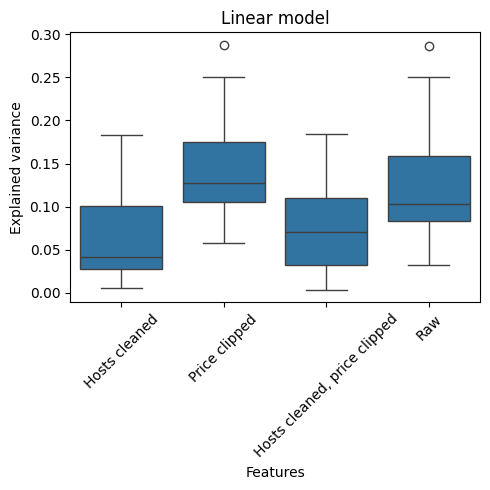

In [18]:
fig, axs=plt.subplots(1,1, figsize=(5,5), sharey=True)
#axs=axs.flatten()

sns.boxplot(linear_results_df, x='Feature set', y='Explained variance', ax=axs)
axs.set_title('Linear model')
axs.set_xlabel('Features')
axs.tick_params(axis='x', labelrotation=45)

# sns.boxplot(tree_results_df, x='Feature set', y='Explained variance', ax=axs[1])
# axs[1].set_title('Tree model')
# axs[1].set_xlabel('Features')
# axs[1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()